In [1]:
import numpy as np

x = np.load(r"C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\res\data_for_ml_all_std_force_quality_freq_time\x_for_ml.npy")
y = np.load(r"C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\res\data_for_ml_all_std_force_quality_freq_time\y_for_ml.npy")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [3]:
x.shape

(238559, 23)

In [4]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(23,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation="softmax"),
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              24576     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 13)                6

In [5]:
learning_rate = 0.0001
optimizer = keras.optimizers.Adam(
    learning_rate=learning_rate,
)
# Compile the model.
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc")
    ],
)

In [6]:
batch_size = 128
num_epochs = 500

# Create an early stopping callback.
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
# Fit the model.
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=2,
)

_, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Epoch 1/500
1342/1342 - 6s - loss: 2.0247 - acc: 0.3136 - val_loss: 1.8483 - val_acc: 0.3648 - 6s/epoch - 4ms/step
Epoch 2/500
1342/1342 - 4s - loss: 1.8336 - acc: 0.3657 - val_loss: 1.7535 - val_acc: 0.3920 - 4s/epoch - 3ms/step
Epoch 3/500
1342/1342 - 4s - loss: 1.7640 - acc: 0.3880 - val_loss: 1.7032 - val_acc: 0.4071 - 4s/epoch - 3ms/step
Epoch 4/500
1342/1342 - 4s - loss: 1.7188 - acc: 0.4021 - val_loss: 1.6665 - val_acc: 0.4140 - 4s/epoch - 3ms/step
Epoch 5/500
1342/1342 - 4s - loss: 1.6853 - acc: 0.4119 - val_loss: 1.6349 - val_acc: 0.4253 - 4s/epoch - 3ms/step
Epoch 6/500
1342/1342 - 4s - loss: 1.6582 - acc: 0.4204 - val_loss: 1.6117 - val_acc: 0.4292 - 4s/epoch - 3ms/step
Epoch 7/500
1342/1342 - 4s - loss: 1.6359 - acc: 0.4269 - val_loss: 1.5874 - val_acc: 0.4379 - 4s/epoch - 3ms/step
Epoch 8/500
1342/1342 - 4s - loss: 1.6171 - acc: 0.4318 - val_loss: 1.5685 - val_acc: 0.4445 - 4s/epoch - 3ms/step
Epoch 9/500
1342/1342 - 4s - loss: 1.5992 - acc: 0.4359 - val_loss: 1.5523 - val

Test accuracy: 50.16%


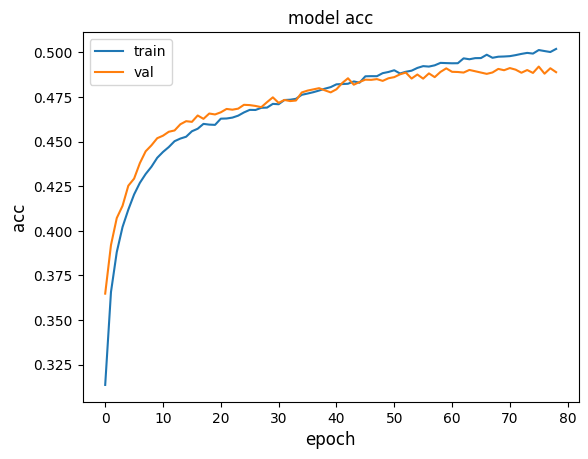

In [7]:
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
import matplotlib.pyplot as plt
metric = "acc"
plt.figure()
plt.plot(history.history[metric], label="train")
plt.plot(history.history["val_" + metric], label="val")
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend()
plt.show()
plt.close()

In [8]:
import pickle 

with open(r'C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\models\time&freq_all_std_force_quality\MLP_time&freq.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://978d552a-c82e-450d-888f-562d9f7debd4/assets


1491/1491 [==============================] - 2s 1ms/step


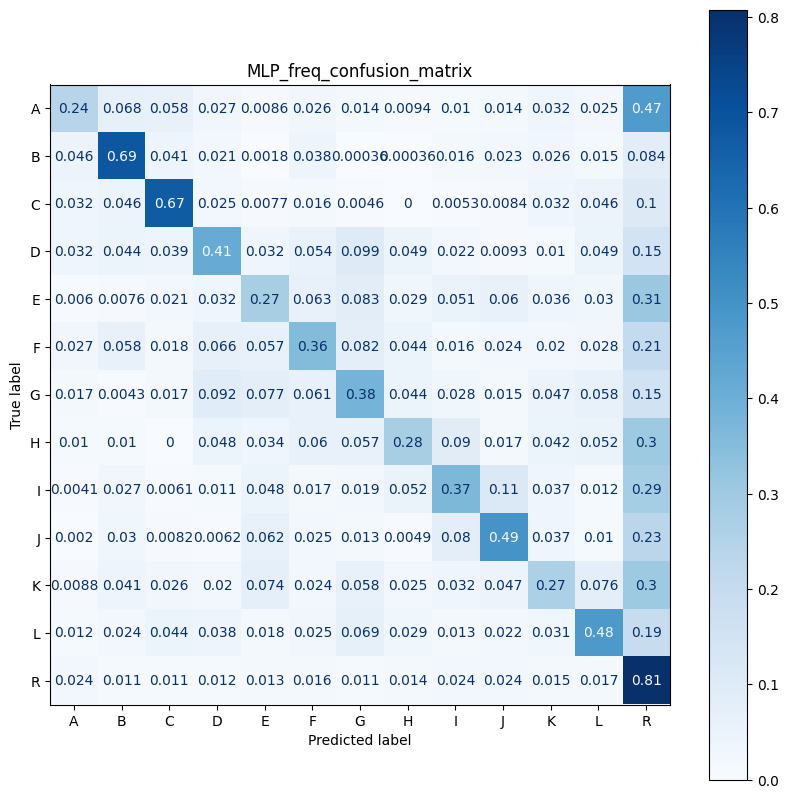

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
np.set_printoptions(precision=2)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=lb.inverse_transform(range(0, 13)),
    cmap=plt.cm.Blues,
    normalize="true",
    ax=ax
)
disp.ax_.set_title("MLP_freq_confusion_matrix")

plt.show()